# Frame identification

2 versions - By factor analysis and by using BERT embeddings and clustering (affinity propagation)
https://www.datacamp.com/community/tutorials/introduction-factor-analysis

In [2]:
import sentence_transformers

In [3]:
print(sentence_transformers.__version__)

2.0.0


In [100]:
import os

import pandas as pd

import pickle

from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.tokenize import sent_tokenize

from time import time
from sentence_transformers import SentenceTransformer

import matplotlib.pyplot as plt

In [217]:
# functions pickle_file and load_pickle merely help with storing pickled files in the event folders on drive
def pickle_file(file_name, file_to_dump):
    directory_path = os.getcwd() + "/../../../../"
    folder_name = file_name.split('_')[0]
    file_path = directory_path +  fr"Dropbox (CBS)/Master thesis data/Candidate Data/{folder_name}/{file_name}"
    with open(file_path, 'wb') as fp:
        pickle.dump(file_to_dump, fp)

def load_pickle(file_name):
    directory_path = os.getcwd() + "/../../../../"
    folder_name = file_name.split('_')[0]
    file_path = directory_path + fr"Dropbox (CBS)/Master thesis data/Candidate Data/{folder_name}/{file_name}"
    with open(file_path, "rb") as input_file:
        return pickle.load(input_file)

In [228]:
file_url = os.getcwd() + "/../../../../" + r"/Dropbox (CBS)/Master thesis data/"
event_url = file_url + r"Event Dataframes/"
event_url_clean = event_url + r"Clean/"

candidate_url = file_url + r"Candidate Data/"

In [102]:
tigray_url_clean = event_url_clean + r"df_tigray_clean.csv" # location of clean Tigray dataset
greece_url_clean = event_url_clean + r"df_greece_clean.csv" # location of clean Greece dataset
rohingya_url_clean = event_url_clean + r"df_rohingya_clean.csv" # location clean of Rohingya dataset
channel_url_clean = event_url_clean +r"df_channel_clean.csv" #Location of clean Channel dataset

In [123]:
tigray_url_fi = event_url_clean + r"df_tigray_fi.csv" # location of Tigray dataset for frame identification
greece_url_fi = event_url_clean + r"df_greece_fi.csv" # location of Greece dataset for frame identification
rohingya_url_fi = event_url_clean + r"df_rohingya_fi.csv" # location of Rohingya dataset for frame identification
channel_url_fi = event_url_clean +r"df_channel_fi.csv" #Location of Channel dataset for frame identification

In [103]:
tigray_candidate_url = candidate_url + r"tigray/tigray_ents"
greece_candidate_url = candidate_url + r"greece/greece_ents"
rohingya_candidate_url = candidate_url + r"rohingya/rohingya_ents"
channel_candidate_url = candidate_url + r"channel/channel_ents"

In [104]:
with open(greece_candidate_url,"rb") as input_file:
    ents = pickle.load(input_file)

In [105]:
def get_entity_list(url):
    with open(url,"rb") as input_file:
        ents = pickle.load(input_file)
        ents = ents[ents["freq"]>15]
        
    return list(ents["entity"])

In [106]:
tigray_ents = get_entity_list(tigray_candidate_url)
greece_ents = get_entity_list(greece_candidate_url)
rohingya_ents = get_entity_list(rohingya_candidate_url)
channel_ents = get_entity_list(channel_candidate_url)

In [107]:
ne_list = set(tigray_ents + greece_ents + rohingya_ents + channel_ents)

In [347]:
ne_list1 = str.split("seeker abiy addis aegean afewerki afeworki afghan afghanistan africa african america amnesty ahmed american amhara andrew ankara antony arab asean asia assad aung bachelet balukhali bangladesh bangladeshi biden blinken boris borisjohnson borrell brexit brit britain british brussels bulgaria burma burmese calais canada channel china commission commissioner corona coronavirus council covid cox dover dublin edirne england english erdoan erdogan eritrea eritrean ethiopia ethiopian euro europe european evros farage filippo fontelles france french freya_cole garneau geneva german germany grandi greece greek guterres haavisto hamdayet harris hindu hitsats houthi houthis idlib idp india indian iran iraq isaias isayas isi israel italy jammu jazeera jerry johnson josep junta justin kachin kadra karen kayin kamala kent kenya kurd labour linda lindat_g lebanon lesbos lesvos libya london maikadra manipur marc merkel michelle mizoram moria muslim mutraw myanmar nation nations nationshumanrights nato nazi nigel november oromia oromo pakistan patel president priti putin reuters rohingya rohingyas russia russian samri secretary shimelba shire somalia spain state sudan sudanese syria syrian tegaru tigrai tigrayan tigrayans thai thailand tory tplf trudeau trump turk turkey turkish unhcr unicef union united unsc us yemen youtube"," ")
ne_list2 = str.split("able absolutely access according account accountable across action actually affected agency agree agreement alive allegation allow allowed allowing almost alone along already also always ambassador amid among another answer anti anymore anyone anything area arent around arrived article asylum attempt attention away back based basic become believe best better black blame blocked born breaking bring brother build call called calling came cant case caught cause centre change claim claiming clear clearly close come coming comment commited commiting completely concern concerned condemn condition confirmed  continue continues could country course cover created credible crisis currently daily day deal dear decade decision demand department despite didnt difference different dire doesnt done dont east eastern easy either effort else endf enough especially ethnic even ever every everyone everything evidence evil exactly expect extremely face facility facing fact failed fake false federal feel find first found four forget free fuck fucking full genuine getting given giving great ground group happy imagine including issue instead isnt give going good half hand happen happened happening hard head heading held high horn hour however huge idea image immediate immediately independent information inside internal internally interview investigate investigation issue join journalist keep kind know known lack land landing largest last latest leader least left let letting level lie like likely little live living load local long longer look looking lost made mail major majority make making many massive matter maybe mean medium member middle might migration mind month morning mostly move much must name national near nearly need needed neighboring never news next nobody north northern nothing obviously office official one ongoing operation others paid part party pas past people perhaps person place plan please point post press prevails prime probably problem process programme provide public push putting question quite rather reach read real realise reality really reason received recent record remains remember report reported reporting resident response responsible rest result right said satellite say saying second seek seeker seeking seem seems seen send sending sent series service several shame share shit show side simple simply since single site situation small someone something soon sorry sort south source speak special spread stand star start started statement street still stop stopped stopping story stupid sure surely system take taken taking talk talking tell term testimony thank thanks thats there theyre thing think though thought three time today told took torn towards town tried true truth trying turn tweet understand unless urgent urgently used using video vice view virus visit voice wait waiting want wanted watch water week welcome well west western withdraw within without whats whilst white whole wing wish wonder wont word world worse wrong would year yesterday young youre"," ")
ne_list = ne_list1 + ne_list2

In [108]:
def read_event_df(data_url):
    # easy dataframe load
    event_df = pd.read_csv(data_url, index_col=0)
    event_df.reset_index(drop=True, inplace=True)
    event_df = event_df[event_df['text_stm'].notna()]
    print(f'loaded {event_df.shape[0]} tweets!')
    return event_df

In [235]:
df_tigray = read_event_df(tigray_url_clean)
df_greece = read_event_df(greece_url_clean)
df_rohingya = read_event_df(rohingya_url_clean)
df_channel = read_event_df(channel_url_clean)

loaded 42843 tweets!
loaded 137418 tweets!
loaded 29423 tweets!
loaded 173615 tweets!


In [204]:
from collections import Counter
from nltk.tokenize import word_tokenize

all_words = list()

for words in df_channel["text_stm"]:
    words_tok = word_tokenize(words)
    for word in words_tok:
        all_words.append(word)

In [304]:
from collections import Counter

counter = Counter(all_words)
counter.most_common() #counter_obj.most_common(n=10)

most_frequent_words = [pair[0] for pair in counter.most_common(int(len(counter)*0.025))]

In [267]:
len(most_frequent_words)

1245

In [505]:
def get_most_frequent_words(df_col):
    
    all_words = list()
    
    for words in df_col:
        for word in words:
            all_words.append(word)
            
    counter = Counter(all_words)
    
    return [pair[0] for pair in counter.most_common(int(len(counter)*0.025))] #0.025

In [506]:
def tokenization(df_col):
    """
    Takes a list with strings and returns a list with tokens
    """
    print("Tokenizing tweets...\n")
    return df_col.apply(lambda x: word_tokenize(x))

def remove_unfrequent_words(df_col):
    print("Removing unfrequent words...\n")
    most_frequent_words = get_most_frequent_words(df_col)
    print(f"(Removing words that are not among {len(most_frequent_words)} most frequent ones.)\n")
    return df_col.apply(lambda x: [token for token in x if token in most_frequent_words])

def remove_named_entities(df_col):
    print("Removing named entities...\n")
    return df_col.apply(lambda x: [token for token in x if token not in ne_list])

def preprocessing(df_col, *steps):
    """
    Takes in a dataframe column with text and applies preprocessing steps given 
    in and returns a string.
    
    Input:
    - df (dataframe): The dataframe containing the text column.
    - steps (functions): Multiple functions for preprocessing can be given in.
    
    Output:
    - List with strings.
    """
    # copying over the column for preprocessing
    temp = df_col.copy()
    for func in steps:
        temp = func(temp)
    return temp.apply(lambda x: " ".join([token for token in x]))

In [507]:
#def remove_words(df_col, min_words):
#    
#    most_frequent_words = get_most_frequent_words(df_col, min_words)
#    print(f"(Removing words that are not among {len(most_frequent_words)} most frequent ones.)\n")
#    
#    words_to_keep = [word for word in most_frequent_words if word not in ne_list]
#    
#    df_col =  df_col.apply(lambda x: [token for token in x if token in words_to_keep])
#    return df_col.apply(lambda x: " ".join([token for token in x]))

In [508]:
#df_greece["tok"] = tokenization(df_greece["text_stm"])

#df_greece["text_frame_identification_001"] = remove_words(df_greece["tok"],0.001)
#df_greece["text_frame_identification_0025"] = remove_words(df_greece["tok"],0.025)
#df_greece["text_frame_identification_005"] = remove_words(df_greece["tok"],0.05)
#df_greece["text_frame_identification_01"] = remove_words(df_greece["tok"],0.1)

In [509]:
df_greece["text_frame_identification"] = preprocessing(df_greece["text_stm"],
                                                  tokenization,
                                                  remove_unfrequent_words,
                                                  remove_named_entities)

most_frequent_words = get_most_frequent_words(df_greece["text_stm"].apply(lambda x: word_tokenize(x)))
words_to_cluster_greece = [word for word in most_frequent_words if word not in ne_list]

Tokenizing tweets...

Removing unfrequent words...

(Removing words that are not among 1251 most frequent ones.)

Removing named entities...



In [116]:
df_tigray["text_frame_identification"] = preprocessing(df_tigray["text_stm"],
                                                  tokenization,
                                                  remove_unfrequent_words,
                                                  remove_named_entities)

most_frequent_words = get_most_frequent_words(df_tigray["text_stm"].apply(lambda x: word_tokenize(x)))
words_to_cluster_tigray = [word for word in most_frequent_words if word not in ne_list]

Tokenizing tweets...

Removing unfrequent words...

(Removing words that are not among 649 most frequent ones.)

Removing named entities...



In [117]:
df_channel["text_frame_identification"] = preprocessing(df_channel["text_stm"],
                                                  tokenization,
                                                  remove_unfrequent_words,
                                                  remove_named_entities)

most_frequent_words = get_most_frequent_words(df_channel["text_stm"].apply(lambda x: word_tokenize(x)))
words_to_cluster_channel = [word for word in most_frequent_words if word not in ne_list]

Tokenizing tweets...

Removing unfrequent words...

(Removing words that are not among 1245 most frequent ones.)

Removing named entities...



In [118]:
df_rohingya["text_frame_identification"] = preprocessing(df_rohingya["text_stm"],
                                                  tokenization,
                                                  remove_unfrequent_words,
                                                  remove_named_entities)

most_frequent_words = get_most_frequent_words(df_rohingya["text_stm"].apply(lambda x: word_tokenize(x)))
words_to_cluster_rohingya = [word for word in most_frequent_words if word not in ne_list]

Tokenizing tweets...

Removing unfrequent words...

(Removing words that are not among 486 most frequent ones.)

Removing named entities...



In [227]:
df_greece.columns

Index(['source', 'text', 'lang', 'id', 'created_at', 'author_id',
       'retweet_count', 'reply_count', 'like_count', 'quote_count',
       'withheld.scope', 'hashtags', 'mentions', 'annotations', 'text_clean',
       'year', 'calendar_week', 'year_month', 'year_calendar_week', 'refugee',
       'migrant', 'immigrant', 'asylum_seeker', 'other', 'date',
       'text_coherent', 'retweet_count_sum', 'count', 'text_alphanum',
       'text_stm', 'text_frame_identification', 'tok',
       'text_frame_identification_0025', 'text_frame_identification_001',
       'text_frame_identification_005', 'text_frame_identification_01'],
      dtype='object')

In [198]:
df_greece_test = df_greece[["text","text_coherent","text_frame_identification","date",'text_frame_identification_0025', 'text_frame_identification_001',
       'text_frame_identification_005', 'text_frame_identification_01']]

In [200]:
#df_greece_test.to_csv('C:\\Users\\jawo19ad\\Documents\\GitHub\\refugee_project\\Code/../../../..//Dropbox (CBS)/Master thesis data/Event Dataframes/Clean/df_greece_fi_test.csv')

In [121]:
df_greece_frame = df_greece[["text","text_coherent","text_frame_identification","date"]]
df_tigray_frame = df_tigray[["text","text_coherent","text_frame_identification","date"]]
df_rohingya_frame = df_rohingya[["text","text_coherent","text_frame_identification","date"]]
df_channel_frame = df_channel[["text","text_coherent","text_frame_identification","date"]]

#df_greece_frame.to_csv(greece_url_fi)
#df_tigray_frame.to_csv(tigray_url_fi)
#df_rohingya_frame.to_csv(rohingya_url_fi)
#df_channel_frame.to_csv(channel_url_fi)

## Create Embeddings

In [519]:
df_greece["text_frame_identification_len"] = df_greece["text_frame_identification"].apply(lambda x: len(x.split(" ")))

In [520]:
df_greece["text_frame_identification_len"].value_counts()

3     20356
1     19806
4     19368
2     19349
5     16773
6     13681
7     10174
8      7295
9      4707
10     2857
11     1624
12      807
13      387
14      138
15       62
16       17
17       12
18        3
19        1
20        1
Name: text_frame_identification_len, dtype: int64

In [537]:
df_greece_frame = df_greece[df_greece["text_frame_identification_len"] > 2]
df_greece_frame.shape

(98263, 32)

In [521]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [538]:
vectorizer = TfidfVectorizer()

In [539]:
embeddings = vectorizer.fit_transform(df_greece_frame["text_frame_identification"])

In [540]:
embeddings_dense = embeddings.toarray()

In [541]:
features = vectorizer.get_feature_names()

In [542]:
kmo_all,kmo_model=calculate_kmo(embeddings_dense)

C:\ProgramData\Anaconda3\lib\site-packages\factor_analyzer\utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


In [533]:
len(kmo_all)

778

In [534]:
sum(kmo_all > 0.5)

75

In [525]:
tf

array([False,  True,  True, False,  True, False, False, False, False,
       False,  True,  True,  True, False, False, False, False, False,
        True,  True, False, False, False,  True,  True,  True, False,
        True,  True,  True, False,  True, False,  True, False, False,
       False,  True,  True, False, False,  True, False,  True,  True,
       False, False, False, False, False, False,  True, False, False,
        True, False, False,  True,  True,  True, False, False, False,
        True,  True, False,  True, False, False, False, False,  True,
        True, False, False, False, False, False, False,  True,  True,
       False, False,  True,  True,  True, False,  True,  True, False,
        True, False, False, False, False, False, False, False,  True,
        True,  True, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False,  True,

In [516]:
words_to_keep = [feature for feature,b in zip(features, tf) if b]

In [518]:
len(words_to_keep)

66

In [517]:
stopwords_greece = [word for word in vectorizer.get_feature_names() if word not in words_to_keep]

In [441]:
?TfidfVectorizer

In [485]:
vectorizer1 = TfidfVectorizer(stop_words=stopwords_greece,smooth_idf=True)
embeddings1 = vectorizer1.fit_transform(df_greece_frame["text_frame_identification"])

In [486]:
vectorizer1.get_feature_names()

['ally',
 'army',
 'attacking',
 'boat',
 'bomb',
 'bombing',
 'center',
 'child',
 'civil',
 'civilian',
 'clash',
 'coast',
 'coastguard',
 'community',
 'control',
 'create',
 'cross',
 'crossing',
 'defend',
 'dictator',
 'displaced',
 'family',
 'fence',
 'fire',
 'fled',
 'flee',
 'food',
 'force',
 'foreign',
 'guard',
 'health',
 'host',
 'hosting',
 'humanitarian',
 'humanity',
 'hundred',
 'illegally',
 'immigration',
 'innocent',
 'island',
 'jihadist',
 'kid',
 'killed',
 'military',
 'movement',
 'order',
 'police',
 'prevent',
 'protect',
 'protection',
 'regime',
 'return',
 'safe',
 'safety',
 'school',
 'security',
 'shelter',
 'shooting',
 'shot',
 'soldier',
 'tear',
 'territory',
 'terrorist',
 'thousand',
 'woman',
 'zone']

In [487]:
embeddings_dense1 = embeddings1.toarray()

In [488]:
# Bartlett’s test of sphericity (want to have p-value of 0)
chi_square_value, p_value=calculate_bartlett_sphericity(embeddings_dense1)
chi_square_value, p_value

(67181.24183884518, 0.0)

In [489]:
kmo_all,kmo_model=calculate_kmo(embeddings_dense1)

C:\ProgramData\Anaconda3\lib\site-packages\factor_analyzer\utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


In [490]:
kmo_model

0.4883275042305532

In [491]:
len(kmo_all)

66

In [492]:
sum(kmo_all > 0.5)

20

In [543]:
fa = FactorAnalyzer(rotation="varimax")
fa.fit(embeddings_dense)
print("Fit finished")
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

Fit finished


array([2.6133827 , 2.21037773, 2.12808771, 2.04872536, 2.01324092,
       1.90343566, 1.89038957, 1.82144031, 1.75288218, 1.74958462,
       1.7160321 , 1.70984263, 1.66775106, 1.65539361, 1.63624676,
       1.6196999 , 1.584113  , 1.57075678, 1.55080911, 1.52357934,
       1.49535572, 1.49120354, 1.48432804, 1.46049544, 1.44536733,
       1.43985184, 1.42082628, 1.41223356, 1.40794068, 1.39993617,
       1.39127757, 1.38471745, 1.37605247, 1.36986083, 1.36368748,
       1.35871824, 1.35384487, 1.35022442, 1.34645162, 1.33980598,
       1.33716343, 1.32927996, 1.32224255, 1.3201675 , 1.31703714,
       1.30960781, 1.304993  , 1.29997222, 1.29439724, 1.2923078 ,
       1.28884352, 1.28360973, 1.28074422, 1.27847388, 1.2750048 ,
       1.2683426 , 1.26370021, 1.26196918, 1.25695892, 1.25553796,
       1.25358248, 1.2483135 , 1.24606822, 1.24139883, 1.23827763,
       1.23678631, 1.23268562, 1.23223136, 1.22958554, 1.22643913,
       1.22377065, 1.22296032, 1.22158892, 1.21678385, 1.21584

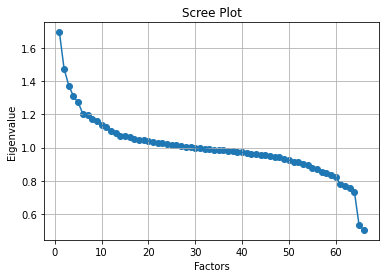

In [494]:
# Create scree plot using matplotlib
plt.scatter(range(1,embeddings_dense1.shape[1]+1),ev)
plt.plot(range(1,embeddings_dense1.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
?fa.fit

In [495]:
fa = FactorAnalyzer(6, rotation="varimax")
fa.fit(embeddings_dense1)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [496]:
fa.loadings_

array([[-1.18090070e-02, -2.35786231e-03, -1.13885291e-02,
        -7.18883940e-02, -7.45804864e-03,  8.22315045e-03],
       [-3.04770220e-02, -1.17877831e-02, -5.63155471e-02,
        -3.63028750e-03, -2.25365244e-02,  3.28309722e-02],
       [ 2.19867315e-02, -1.60083135e-02, -2.12166517e-02,
         9.65154712e-03, -1.09406375e-02,  2.65093410e-02],
       [ 3.14493130e-01, -1.31574422e-02,  2.16547877e-02,
         7.90007249e-02, -2.24769774e-02, -1.50403080e-03],
       [-2.66709063e-02, -1.96561139e-02,  2.25698441e-02,
        -2.12021903e-03, -1.77978275e-02,  5.49844908e-02],
       [-1.24503740e-02, -6.52222418e-03,  3.66794122e-03,
        -1.04045365e-01, -5.94007252e-03,  4.74827825e-02],
       [-1.01441525e-02, -1.07609729e-03, -1.26556348e-02,
         8.35074611e-02, -2.78719922e-02, -2.52565694e-01],
       [-4.44914045e-03, -6.19417741e-02,  5.45025013e-01,
         1.67582957e-01, -4.39866733e-02,  1.13214310e-01],
       [-8.74556545e-03, -8.48155919e-03,  1.026

In [498]:
factor_dict =dict()
for word,factor in zip(words_to_cluster,fa.loadings_):
    factor_dict[word] = factor
    
factor_df = pd.DataFrame.from_dict(factor_dict)
factor_df

,million,right,crisis,stop,help,camp,child,year,back,illegal,...,migration,policy,invasion,another,give,last,work,today,fire,free
0,-0.011809,-0.030477,0.021987,0.314493,-0.026671,-0.012450,-0.010144,-0.004449,-0.008746,-0.018948,...,-0.012717,0.045992,0.037778,-0.017317,-0.071228,-0.006588,-0.020206,-0.060769,-0.017748,-0.038564
1,-0.002358,-0.011788,-0.016008,-0.013157,-0.019656,-0.006522,-0.001076,-0.061942,-0.008482,-0.000697,...,0.001999,-0.018453,-0.015605,-0.017398,-0.048208,0.002507,-0.013944,0.991078,-0.038544,-0.007961
2,-0.011389,-0.056316,-0.021217,0.021655,0.022570,0.003668,-0.012656,0.545025,0.010268,0.005781,...,0.060644,-0.027562,-0.052311,-0.059997,-0.123713,-0.032844,-0.019099,0.017303,0.352648,-0.029774
3,-0.071888,-0.003630,0.009652,0.079001,-0.002120,-0.104045,0.083507,0.167583,-0.055881,-0.162454,...,-0.033869,0.016482,0.038174,-0.075964,0.266565,-0.013477,-0.087898,0.091564,0.087245,-0.002055
4,-0.007458,-0.022537,-0.010941,-0.022477,-0.017798,-0.005940,-0.027872,-0.043987,-0.007186,0.006609,...,-0.002674,-0.026116,-0.036081,-0.047407,-0.063016,0.015515,0.006207,-0.030184,-0.025837,0.509421
5,0.008223,0.032831,0.026509,-0.001504,0.054984,0.047483,-0.252566,0.113214,-0.017546,0.098905,...,-0.003418,0.044922,0.079311,0.110882,0.155130,-0.053041,-0.000422,0.022026,0.072091,0.037960


In [504]:
factor_df_transposed = factor_df.T 
factor_df_transposed[factor_df_transposed[0]>0.1]

,0,1,2,3,4,5
stop,0.314493,-0.013157,0.021655,0.079001,-0.022477,-0.001504
human,0.769323,0.010709,-0.038478,0.111680,0.009912,0.069441
life,0.560959,-0.001041,-0.081945,0.108192,-0.019040,0.119905


In [501]:
embeddings1.shape

(62252, 66)

In [ ]:
vector_dict =dict()
for word,vector in zip(words_to_cluster,embeddings):
    vector_dict[word] = vector
    
vector_df = pd.DataFrame.from_dict(vector_dict)

In [450]:
df_greece["text_frame_identification"]

0                                               life
1                                             border
2                                               wave
3                                     island hosting
4                                                   
                             ...                    
137457                                              
137458                     army border mass invasion
137459                                poor home work
137460           attack border invasion attack force
137461    crime attack fighting invader border guard
Name: text_frame_identification, Length: 137418, dtype: object

### Train Bert

In [50]:
def create_bert_embedding(df, words_to_cluster):
    
    tweet_sentences = [sent for tweet in df['text_alphanum'] for sent in sent_tokenize(tweet)]
    sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

    bert_corpus = tweet_sentences + words_to_cluster

    print(len(bert_corpus))
    t0 = time()
    document_embeddings = sbert_model.encode(bert_corpus)
    print(f'Training embeddings took {time()-t0} seconds')
    
    return document_embeddings

In [52]:
greece_bert = create_bert_embedding(df_greece, words_to_cluster_greece)

357611
Training embeddings took 17201.172611951828 seconds


In [53]:
tigray_bert = create_bert_embedding(df_tigray, words_to_cluster_tigray)

108610
Training embeddings took 6313.1803567409515 seconds


In [54]:
rohingya_bert = create_bert_embedding(df_rohingya, words_to_cluster_rohingya)

68993
Training embeddings took 3697.816387653351 seconds


In [55]:
channel_bert = create_bert_embedding(df_channel, words_to_cluster_channel)

484502
Training embeddings took 23848.87373805046 seconds


In [218]:
pickle_file('greece_frame_embeddings', greece_bert)
pickle_file('tigray_frame_embeddings', tigray_bert)
pickle_file('rohingya_frame_embeddings', rohingya_bert)
pickle_file('channel_frame_embeddings', channel_bert)

In [219]:
pickle_file('greece_words_to_cluster', words_to_cluster_greece)
pickle_file('tigray_words_to_cluster', words_to_cluster_tigray)
pickle_file('rohingya_words_to_cluster', words_to_cluster_rohingya)
pickle_file('channel_words_to_cluster', words_to_cluster_channel)

In [ ]:
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

bert_corpus = tweet_sentences + words_to_cluster

print(len(bert_corpus))
t0 = time()
document_embeddings = sbert_model.encode(bert_corpus)
print(f'Training embeddings took {time()-t0} seconds')

In [ ]:
print(sentence_transformers.__version__)

In [78]:
words_embeddings = document_embeddings[len(tweet_sentences):]
len(words_embeddings)

NameError: name 'document_embeddings' is not defined

In [ ]:
dict(zip(vectorizer.get_feature_names(), embeddings.toarray()[0]))

In [136]:
tweet_sentences_greece = [sent for tweet in df_greece['text_alphanum'] for sent in sent_tokenize(tweet)]

In [137]:
word_embeddings_greece = greece_bert[len(tweet_sentences_greece):]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

stopwords = [word for word in vectorizer.get_feature_names() if word not in words_to_cluster]
vectorizer = TfidfVectorizer(stop_words = stopwords)

embeddings = vectorizer.fit_transform(unique_tweets_df['text_alphanum'])
print(vectorizer.get_feature_names())

In [ ]:
from nltk.tokenize import sent_tokenize

tweet_sentences = [sent for tweet in unique_tweets_df['text_alphanum'] for sent in sent_tokenize(tweet)]
len(tweet_sentences)

In [ ]:
from time import time
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

bert_corpus = tweet_sentences + words_to_cluster

print(len(bert_corpus))
t0 = time()
document_embeddings = sbert_model.encode(bert_corpus)
print(f'Training embeddings took {time()-t0} seconds')

In [ ]:
words_embeddings = document_embeddings[len(tweet_sentences):]
len(words_embeddings)

In [ ]:
dict(zip(vectorizer.get_feature_names(), embeddings.toarray()[0]))

## Factor analysis

In [ ]:
words_embeddings = load_pickle('greece_bert_embeddings')

In [138]:
words_embeddings = word_embeddings_greece

In [148]:
vector_df.isna().sum()

0

In [140]:
vector_dict =dict()
for word,vector in zip(words_to_cluster_greece,words_embeddings):
    vector_dict[word] = vector
    
vector_df = pd.DataFrame.from_dict(vector_dict)

In [151]:
chi_square_value, p_value=calculate_bartlett_sphericity(vector_df)
chi_square_value, p_value

C:\ProgramData\Anaconda3\lib\site-packages\factor_analyzer\factor_analyzer.py:118: RuntimeWarning: divide by zero encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:1266: RuntimeWarning: invalid value encountered in subtract
  return sc.xlogy(df/2.-1, x) - x/2. - sc.gammaln(df/2.) - (np.log(2)*df)/2.


(inf, nan)

In [141]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(vector_df)
kmo_model

nan

In [142]:
kmo_all

array([nan, nan, nan, ..., nan, nan, nan])

# !

In [152]:
from factor_analyzer import FactorAnalyzer
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(vector_df)
eigen_values, vectors = fa.get_eigenvalues()
ev, v = fa.get_eigenvalues()
ev

array([ 6.98170822e+02,  6.15643496e+01,  2.74392388e+01, ...,
       -6.80665489e-15, -7.23782721e-15, -1.31274389e-14])

In [156]:
fa = FactorAnalyzer(8,rotation='varimax')
fa.fit(vector_df)
fa.loadings_

array([[ 0.5591498 ,  0.26232961,  0.1421388 , ...,  0.52135674,
         0.1564291 , -0.08579294],
       [ 0.80202759,  0.2402963 ,  0.42277575, ...,  0.10855167,
         0.14933181,  0.00148477],
       [ 0.45446674,  0.75851588,  0.1387505 , ...,  0.17084086,
         0.00321452,  0.17205969],
       ...,
       [ 0.26801312,  0.4440313 ,  0.03012718, ...,  0.13391058,
         0.17683644, -0.04121899],
       [ 0.65853832,  0.3494775 ,  0.23577034, ...,  0.09016037,
         0.05169822, -0.01761102],
       [-0.01549855,  0.60395185,  0.2936716 , ...,  0.23852288,
        -0.16654519,  0.03617725]])

In [157]:
factor_dict =dict()
for word,factor in zip(words_to_cluster,fa.loadings_):
    factor_dict[word] = factor
    
factor_df = pd.DataFrame.from_dict(factor_dict)
factor_df

,million,right,crisis,stop,help,camp,child,year,back,illegal,...,funded,leverage,vehicle,weaponized,nine,naked,secure,alien,vessel,homeless
0,0.559150,0.802028,0.454467,0.467937,0.696474,0.428724,0.491324,0.567960,0.750028,0.189122,...,0.642741,0.566048,0.533897,0.480772,0.556380,0.089049,0.424473,0.268013,0.658538,-0.015499
1,0.262330,0.240296,0.758516,0.678734,0.310521,0.164318,0.286453,0.203065,0.441203,0.788052,...,0.262760,0.480219,0.319887,0.464563,0.261044,0.587798,0.128603,0.444031,0.349477,0.603952
2,0.142139,0.422776,0.138751,0.087723,0.414351,0.225711,0.302220,0.172113,0.153584,0.274067,...,0.525228,0.346378,0.236265,0.290491,0.242364,0.206138,0.764889,0.030127,0.235770,0.293672
3,0.069198,-0.052656,0.168720,0.083585,0.260511,0.472473,0.369387,0.206922,0.133085,0.063767,...,0.172444,0.295814,0.491304,0.322113,0.078327,-0.024997,0.162073,0.170827,0.318039,0.304332
4,0.095338,0.126932,0.067339,0.414472,0.019238,0.135389,0.062252,0.128646,0.203300,0.299587,...,-0.048517,-0.094704,0.089619,0.049355,0.266255,0.614700,0.171752,0.246698,0.080963,0.083757
5,0.521357,0.108552,0.170841,0.084425,0.001089,0.199444,0.027368,0.525760,0.230387,0.050137,...,0.227349,0.052107,0.029504,0.028232,0.367207,0.040128,0.020652,0.133911,0.090160,0.238523
6,0.156429,0.149332,0.003215,-0.013610,0.021649,-0.128033,0.090705,-0.035445,0.049393,-0.015276,...,0.070770,0.148605,0.219462,0.274342,0.112562,0.057057,0.180282,0.176836,0.051698,-0.166545
7,-0.085793,0.001485,0.172060,-0.127447,0.109134,-0.028697,0.183926,0.091577,0.016447,0.123880,...,0.010893,0.215381,0.072823,0.150118,0.047483,-0.140126,0.061309,-0.041219,-0.017611,0.036177


In [168]:
factor_df_transposed = factor_df.T 
factor_df_transposed[factor_df_transposed[0]>0.6]

,0,1,2,3,4,5,6,7
right,0.802028,0.240296,0.422776,-0.052656,0.126932,0.108552,0.149332,0.001485
help,0.696474,0.310521,0.414351,0.260511,0.019238,0.001089,0.021649,0.109134
back,0.750028,0.441203,0.153584,0.133085,0.203300,0.230387,0.049393,0.016447
open,0.744733,0.195558,0.384544,0.104071,0.117539,0.029671,0.262515,-0.139846
news,0.613226,0.363217,0.261500,0.173573,-0.027101,0.243353,0.040545,-0.013139
...,...,...,...,...,...,...,...,...
couple,0.611650,0.216561,0.399804,0.270981,0.043119,0.145314,-0.047949,0.045120
gather,0.787129,0.264692,0.233996,0.273640,0.108069,0.098242,0.100004,-0.055289
grow,0.684127,0.225808,0.238009,0.271731,0.086286,0.230837,0.218085,-0.006097
funded,0.642741,0.262760,0.525228,0.172444,-0.048517,0.227349,0.070770,0.010893


## Clustering frame modeling

In [ ]:
from time import time
import umap.umap_ as umap
start = time()
reducer = umap.UMAP(random_state=42,n_components=3)
reduced_embedding = reducer.fit_transform(words_embeddings)
print(f'Duration: {time() - start} seconds')

In [ ]:
from sklearn.cluster import DBSCAN
start = time()
cluster_labels = DBSCAN(min_samples=6).fit_predict(reduced_embedding)
print(f'Duration: {time() - start} seconds')


In [ ]:
from sklearn.cluster import AffinityPropagation

start = time()
cluster_labels = AffinityPropagation().fit_predict(reduced_embedding)
print(f'Duration: {time() - start} seconds')

In [ ]:
from sklearn.cluster import KMeans
k_clusters = KMeans(n_clusters=8, random_state=42).fit_predict(reduced_embedding)

In [ ]:
import seaborn

seaborn.scatterplot(x = reducer.embedding_[:, 0],
                y = reducer.embedding_[:, 1],
                hue = cluster_labels, palette ="Paired")

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = reducer.embedding_[:, 0]
y = reducer.embedding_[:, 1]
z = reducer.embedding_[:, 2]

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.scatter(x, y, z, c = cluster_labels)

plt.show()

In [ ]:
labeled_tweets = pd.DataFrame({'word': words_to_cluster,'label':cluster_labels})

# Create documents per label
docs_per_class = labeled_tweets.groupby(['label'], as_index=False).agg({'word': ' '.join})

words_per_class = dict()
for label,word in zip(docs_per_class['label'],docs_per_class['word']):
    words_per_class[label] = word.split(' ')


In [ ]:
pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in words_per_class.items() ])).fillna('.')

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans, DBSCAN
def kmean_test_n_clusters(data, n_clusters):
    """
    Takes the document vectors and the maximum amount of clusters to look for. 
    Performs KMeans algorithm on the dataset for each amount of clusters. 
    Calculates silhouette score and interias for each amount of clusters. 
    Plots the scores as a function of the amount of clusters.
    
    Arguments: 
    data -- document vectors as numpy matrices
    n_clusters -- integer that determines the maximum amount of clusters to test
    
    Returns: 
    Prints the scores as functions of the clusters in range 1, n_clusters
    """
    n_clusters += 1
    kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(data) for k in tqdm(range(1, n_clusters))]
    print("clusters done")
    inertias = [model.inertia_ for model in kmeans_per_k]
    print("inertias done")
    silhouette_scores = [silhouette_score(data, model.labels_)
                         for model in tqdm(kmeans_per_k[1:])]
    print("silhouettes done")

    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8, 3.5))

    ax1.plot(range(1, n_clusters), inertias, "bo-")
    ax1.set_xlabel("$k$", fontsize=14)
    ax1.set_ylabel("Inertia", fontsize=14)
    #ax1.annotate('Elbow',
    #             xy=(4, inertias[3]),
    #             xytext=(0.55, 0.55),
    #             textcoords='figure fraction',
    #             fontsize=16,
    #             arrowprops=dict(facecolor='black', shrink=0.1)
    #            )
    ax2.plot(range(2, n_clusters), silhouette_scores, "bo-")
    ax2.set_xlabel("$k$", fontsize=14)
    ax2.set_ylabel("Silhouette score", fontsize=14)
    #plt.axis([2, 8, 0.3, 0.475])
    plt.show()

In [ ]:
kmean_test_n_clusters(reduced_embedding, 30)

In [ ]:
# train this model only after the first merging step to save both memory and time
words_to_cluster =  ["accept" ,        "ally"     ,      "army"     ,      "attack"     ,    "attacking"  ,    "authority"   ,   "benefit"       
,"billion"    ,    "blackmail"    ,  "block"   ,       "boat"    ,       "bomb"     ,      "bombing"  ,      "border"        
,"break"       ,   "build"   ,       "burden"    ,     "camp" ,          "care"      ,     "child",          "citizen"       
,"city"       ,    "civil"    ,      "civilian" ,      "clash" ,         "closed"         ,"coast" ,         "community"     
,"conflict"  ,     "control"   ,     "creating",       "crime"  ,        "criminal"      , "cross"  ,        "crossing"      
,"dead"     ,      "death"      ,    "defend" ,        "desperate",      "dictator"     ,  "displaced",      "door"          
,"economic",       "economy"     ,   "entering"       ,"entry"     ,     "family"      ,   "fear"      ,     "fence"         
,"fight"          ,"fighting"     ,  "fire"          , "fled"       ,    "flee"       ,    "fleeing"    ,    "flood"         
, "flow"         ,  "food"         ,  "force"       ,   "forced"     ,    "foreign"  ,      "friend"     ,    "game"          
 ,"gate"        ,   "government"    , "guard"      ,    "health"      ,   "help"    ,       "helping"     ,   "history"       
, "hold"       ,    "hope"           ,"host"      ,     "hosting"      ,  "house"  ,        "human"        ,  "humanitarian"  
,"humanity"   ,    "hundred"  ,      "illegal"   ,     "illegally"      ,"influx" ,        "innocent"       ,"invade"        
, "invader"  ,      "invading" ,      "invasion",       "islamic"        ,"jihadist"      , "kid" ,           "kill"          
,"killed"   ,      "killing"    ,    "leaving" ,       "legal"   ,       "march"         , "mass"  ,         "military"      
, "million"       , "minister"   ,    "money"         , "movement",       "national"    ,   "number",         "official"      
, "opening"      ,  "order"       ,   "peace"        ,  "picture"  ,      "police"     ,    "policy" ,        "population"    
, "power"       ,   "pressure"     ,  "prevent"     ,   "protect"   ,     "protection",     "pushing" ,       "refuge"        
,"regime"      ,   "region"         ,"respect"     ,   "responsibility", "return"    ,     "risk"      ,     "rule"          
,"safety"     ,    "school"    ,     "security"   ,    "shelter" ,       "shooting" ,      "shot"       ,    "social"        
,"soldier"      ,  "solidarity" ,    "solution"  ,     "suffering",      "support" ,       "supporting"  ,   "tension"       
, "territory"  ,    "terrorist"  ,    "thousand",       "threat"   ,      "travel",         "troop"       ,   "violence"      
, "war"       ,     "wave"        ,   "weapon" ,        "woman"     ,     "work" ,          "worker"       ,  "working"       
, "zone"]

print(unique_tweets_df['text_alphanum'].shape)
len(words_to_cluster)